In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline


In [42]:
csv_file = "data/netflix_titles.csv"
netflix_data_df = pd.read_csv(csv_file)
netflix_data_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [55]:
#renaming two columns (type and listed_in) 

netflix_data_df.rename(columns = {'type':'entertainment type', 'listed_in':'genre'}, inplace= True)
netflix_data_df.head()

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016.0
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018.0
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017.0


In [56]:
#we are going to add values in null for country and rating
netflix_data_df.isnull().sum()

show_id                 0
entertainment type      0
title                   0
country               476
release_year            0
rating                 10
duration                0
genre                   0
year_added             11
dtype: int64

In [57]:
#counting the number of countries
country_count= netflix_data_df['country'].value_counts()
country_count


United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [60]:
#replaced the null values with "united states"
netflix_data_df['country'].replace(np.nan, 'United States', inplace=True)
netflix_data_df

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016.0
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018.0
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017.0
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",NaN
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,NaN,60 min,Movies,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",NaN


In [61]:
#checking to reconfirm no null values in country column
netflix_data_df.isnull().sum()

show_id                0
entertainment type     0
title                  0
country                0
release_year           0
rating                10
duration               0
genre                  0
year_added            11
dtype: int64

In [62]:
#counting the highest rating based on the number of movies which is TV-MA and we will use this rating to fill any null values
#in rating column
rating_count= netflix_data_df['rating'].value_counts()
rating_count

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [64]:
netflix_data_df['rating'].replace(np.nan, 'TV-MA', inplace= True)
netflix_data_df.head()

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016.0
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018.0
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017.0


In [65]:

netflix_data_df.isnull().sum()

show_id                0
entertainment type     0
title                  0
country                0
release_year           0
rating                 0
duration               0
genre                  0
year_added            11
dtype: int64

In [73]:
# netflix_data_df["date_added"] = netflix_data_df["date_added"].str.strip()
# netflix_data_df['year_added']=pd.DatetimeIndex(netflix_data_df['date_added']).year
# netflix_data_df


In [52]:
# removing director, cast, date_added, and description
netflix_data_df = netflix_data_df.drop(netflix_data_df.columns[[3, 4, 6, 11]], axis=1)
netflix_data_df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019.0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016.0
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018.0
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017.0


In [53]:
netflix_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6234 non-null   int64  
 1   type          6234 non-null   object 
 2   title         6234 non-null   object 
 3   country       5758 non-null   object 
 4   release_year  6234 non-null   int64  
 5   rating        6224 non-null   object 
 6   duration      6234 non-null   object 
 7   listed_in     6234 non-null   object 
 8   year_added    6223 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 438.5+ KB


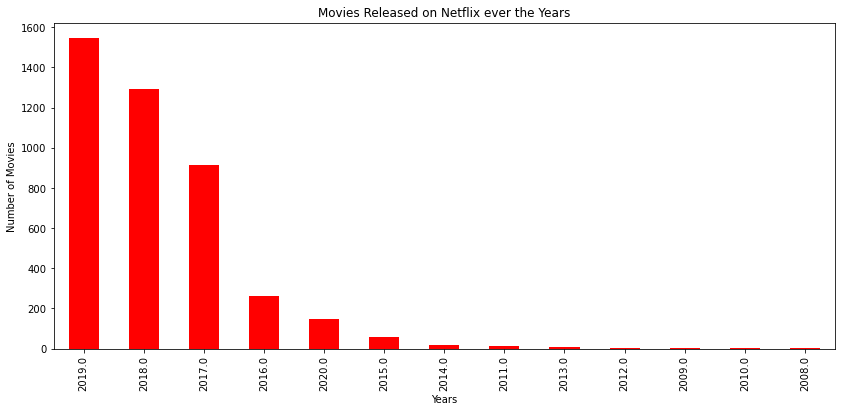

In [74]:
# creating bar graph to show how many movies were released over the years on netflix
plt.figure(figsize=(14,6))
netflix_data_df[netflix_data_df["entertainment type"]=="Movie"]["year_added"].value_counts().plot(kind="bar",color="Red")
plt.title("Movies Released on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of Movies")
plt.show()

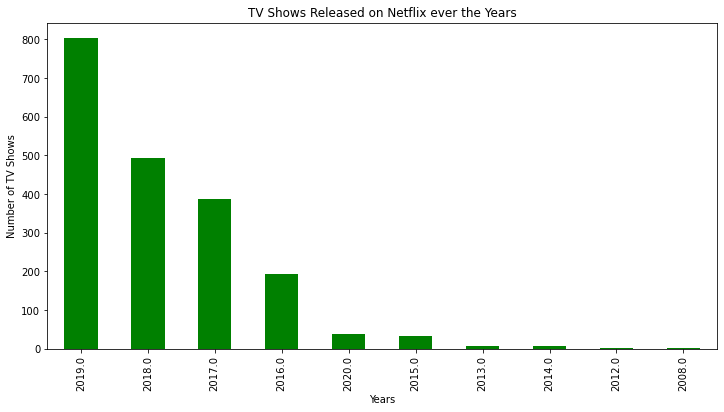

In [75]:
# creating bar graph to show how many TV shows were released over the years on netflix
plt.figure(figsize=(12,6))
netflix_data_df[netflix_data_df["entertainment type"]=="TV Show"]["year_added"].value_counts().plot(kind="bar",color="Green")
plt.title("TV Shows Released on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of TV Shows")
plt.show()

In [76]:
netflix_data_df.isnull().sum()

show_id                0
entertainment type     0
title                  0
country                0
release_year           0
rating                 0
duration               0
genre                  0
year_added            11
dtype: int64

In [77]:
netflix_type_count= netflix_data_df.groupby(["entertainment type"])["entertainment type"].count()
netflix_type_count


entertainment type
Movie      4265
TV Show    1969
Name: entertainment type, dtype: int64

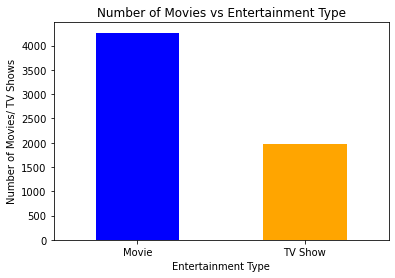

In [78]:
# creating a bar plot to show number of movies and tv shows released
netflix_type_count.plot(x = "entertainment type", y = "entertainment type", kind = "bar", color=["blue","orange"]) 
plt.title("Number of Movies vs Entertainment Type")
plt.xlabel("Entertainment Type",  )
plt.xticks(rotation="horizontal")
plt.ylabel("Number of Movies/ TV Shows")
plt.show()



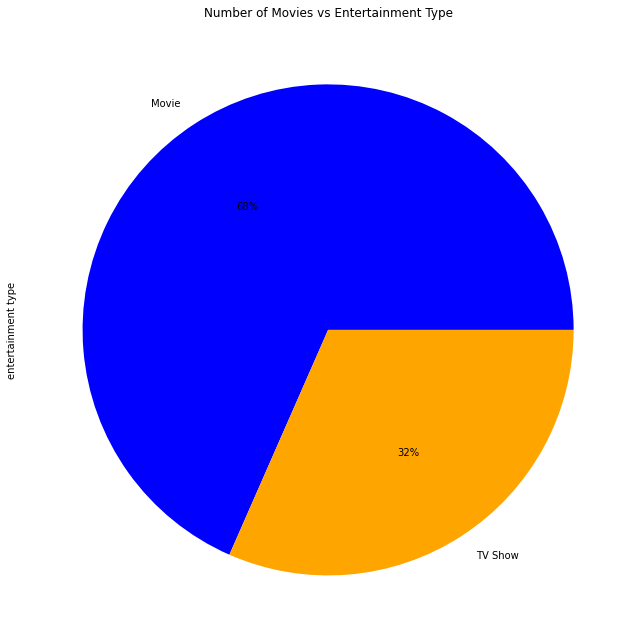

In [83]:
#pie plot for movies and tv shows distribution on netflix
netflix_type_count.plot.pie(autopct='%1.0f%%' , colors = ['blue', 'orange'],figsize=(11,20))
plt.title("Number of Movies vs Entertainment Type")
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

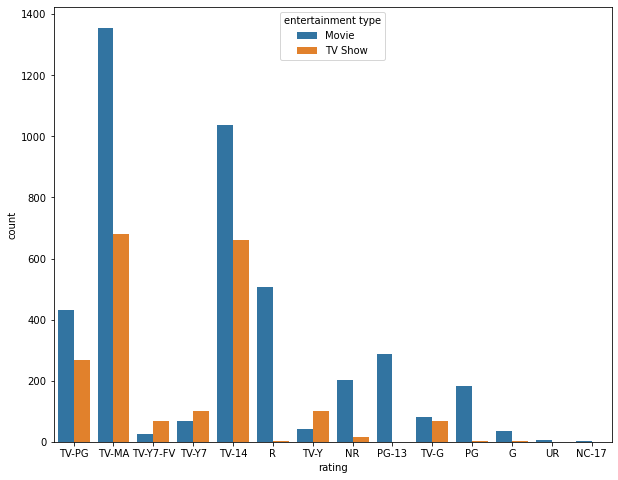

In [84]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data = netflix_data_df, hue="entertainment type")


In [85]:
release_year_df= netflix_data_df.groupby(["release_year"])["release_year"].count()
release_year_df

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: release_year, Length: 72, dtype: int64

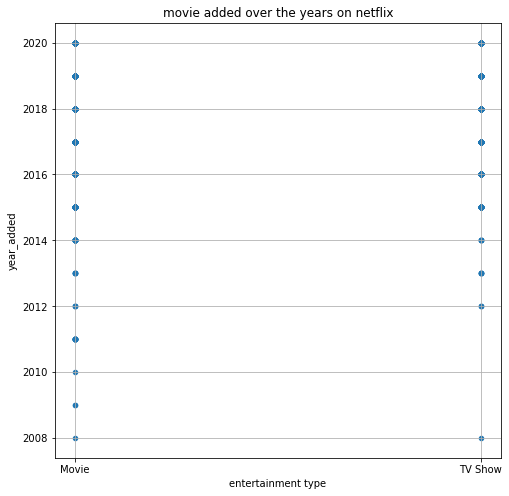

In [86]:
netflix_data_df.plot(kind="scatter", x= "entertainment type", y="year_added", grid=True, figsize=(8,8),
              title="movie added over the years on netflix")
plt.show()

In [87]:
netflix_genre_count= netflix_data_df.groupby(["genre"])["genre"].count()
netflix_genre_count

genre
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        10
Thrillers                                                       40
Name: genre, Length: 461, dtype: int64

In [88]:
netflix_genre=netflix_data_df['genre'].value_counts().nlargest(10)
netflix_genre

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies')

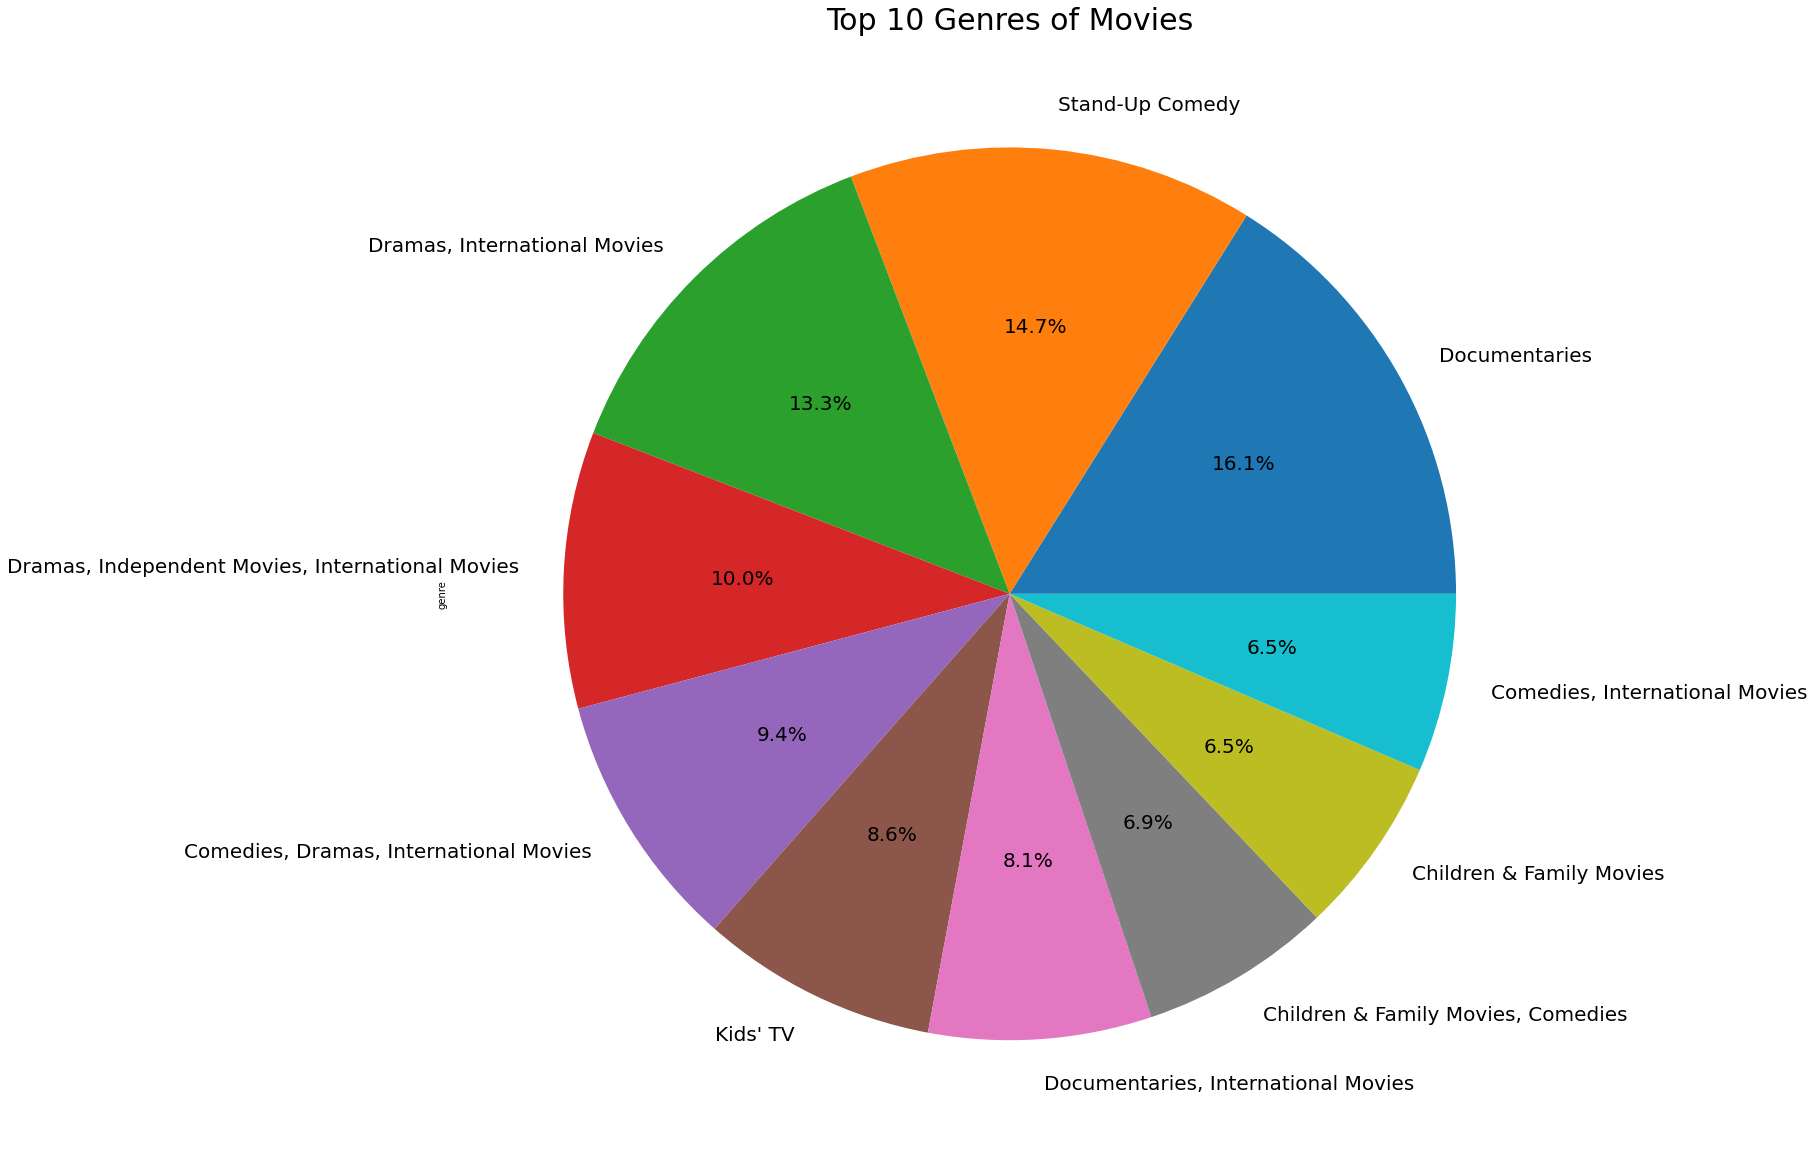

In [89]:

netflix_genre.plot.pie(autopct='%1.1f%%', figsize=(20, 35), textprops={'fontsize': 20})
plt.title("Top 10 Genres of Movies", size=30)


In [90]:

year_data = netflix_data_df['year_added'].value_counts().sort_index()
year_data


2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0      12
2014.0      25
2015.0      90
2016.0     456
2017.0    1300
2018.0    1782
2019.0    2349
2020.0     184
Name: year_added, dtype: int64

In [107]:
type_data = netflix_data_df.groupby('year_added')['entertainment type'].value_counts().unstack().fillna(0)
type_data

entertainment type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,4.0,3.0
2013.0,6.0,6.0
2014.0,19.0,6.0
2015.0,58.0,32.0
2016.0,264.0,192.0


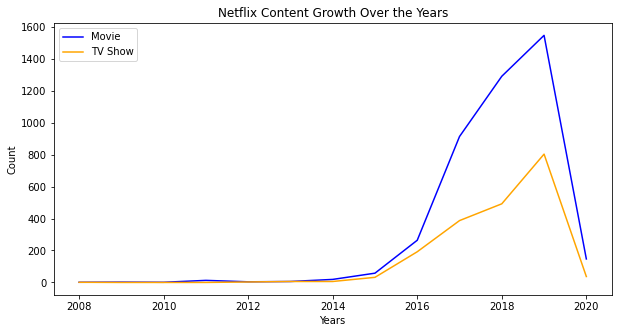

In [92]:

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(type_data['Movie'], color='blue', label='Movie')
ax.plot(type_data['TV Show'], color='orange', label='TV Show')
plt.legend(loc="upper left")
plt.title('Netflix Content Growth Over the Years')
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()


In [93]:

netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]


<AxesSubplot:xlabel='year_added', ylabel='count'>

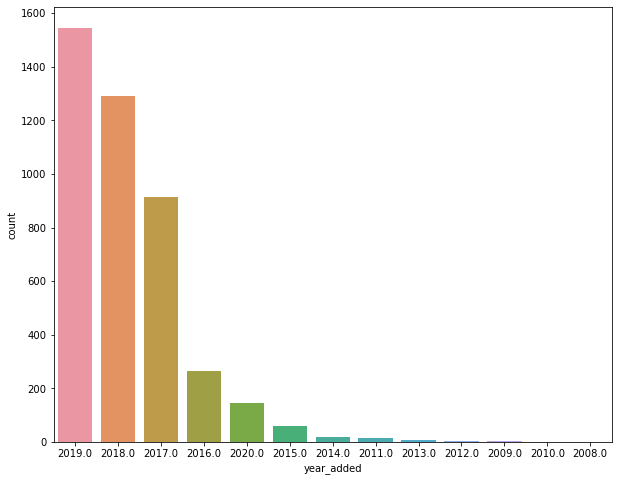

In [94]:

plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_movies_only, order = netflix_df_movies_only['year_added'].value_counts().index[0:14])
     

In [95]:
netflix_df_shows_only = netflix_data_df[netflix_data_df["entertainment type"] == "TV Show"]

<AxesSubplot:xlabel='year_added', ylabel='count'>

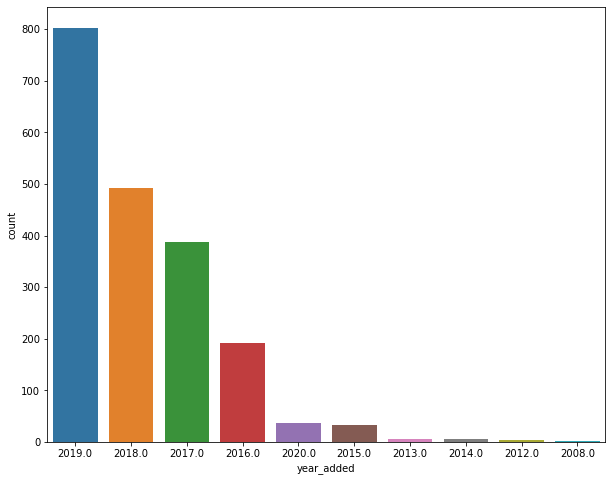

In [96]:
plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_shows_only, order = netflix_df_shows_only['year_added'].value_counts().index[0:14])

In [114]:
# netflix_df_shows_only.groupby('duration').sort_index().unstack()


In [113]:
# netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]

# lines =netflix_df_movies_only.plot.line(x='release_year', y='duration')
# plt.show()



#questions: 
# What content is available in different countries?
# Which genre is most watched?
# Highest-rated movie in a particular year?
# How many TV shows and movies are available for kids?


dataFrame.plot.bar(x="type", y="show", rot=70, title="Number of tourist visits - Year 2018");
plot.show(block=True);